Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")

The happiness data

In [3]:
happiness_data = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [4]:
print(happiness_data.head())
print(len(happiness_data))

   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5
126


From the data description, it is apparent that a slightly larger portion of the people are 'happy' customers. 
* X1 refers to timely order delivery
* X2 refers to expected content of the order delivered
* X3 refers to the adequacy of the ingeredients to order
* X4 refers to value for money
* X5 refers to courier satisfaction
* X6 refers to easy application interface.

And,
* Y is our target variable, with 1 refereing to happy customers and 0 refering to unhappy customers.


The dataset consists of 126 examples with 6 ordinal features

In [5]:
happiness_data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


From our data description, we observe that 
* there are slightly more happy customers.
* A lot of people believe that the delivery occurs on time.
* A similar trend is observed for the application interface.
* People were divided on the expected order contents.
* An above average feeling is observed for the other variables.

In [6]:
happiness_data.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

Exploratory Data Analysis of the happiness data

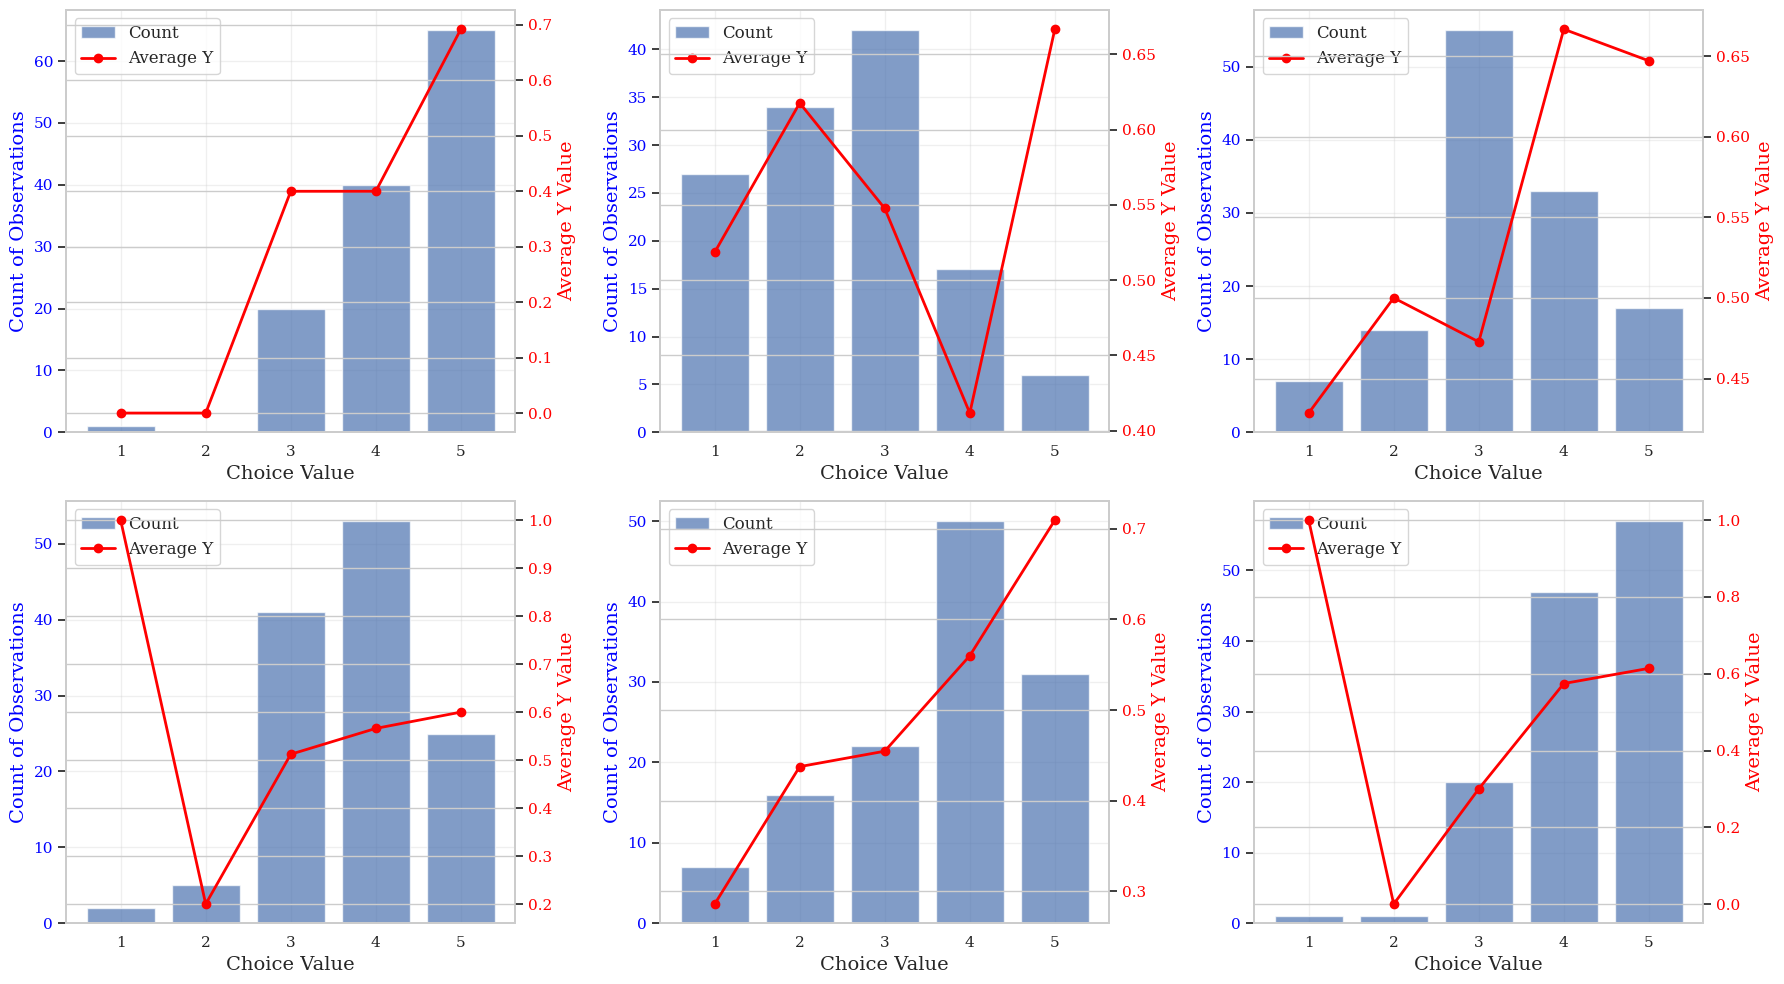

In [7]:
plt.rcParams["font.family"] = "serif"

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    
    # Calculate counts and average Y values for each choice
    vals = [1, 2, 3, 4, 5]
    counts = []
    avg_y_values = []
    
    for val in vals:
        # Filter data for current feature value
        mask = happiness_data[feature] == val
        filtered_data = happiness_data[mask]
        
        # Count observations
        count = len(filtered_data)
        counts.append(count)
        
        # Calculate average Y value (handle case where no observations exist)
        if count > 0:
            avg_y = filtered_data['Y'].mean()
        else:
            avg_y = 0
        avg_y_values.append(avg_y)
    
    # Create the primary axis for counts (bar plot)
    ax1 = axes[row, col]
    bars = ax1.bar(vals, counts, alpha=0.7, label='Count')
    ax1.set_xlabel('Choice Value', fontsize=14)
    ax1.set_ylabel('Count of Observations', color='blue', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(vals)
    ax1.grid(True, alpha=0.3)
    
    # Create secondary y-axis for average Y values (line plot)
    ax2 = ax1.twinx()
    line = ax2.plot(vals, avg_y_values, color='red', marker='o', linewidth=2, 
                    markersize=6, label='Average Y')
    ax2.set_ylabel('Average Y Value', color='red', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Create combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

The above plots show that an upward trend for features X1 and X5 correspond to more happy customers. X6 also shows such a trend, however, a single choice of 1 is not a large enough sample size to prove this.

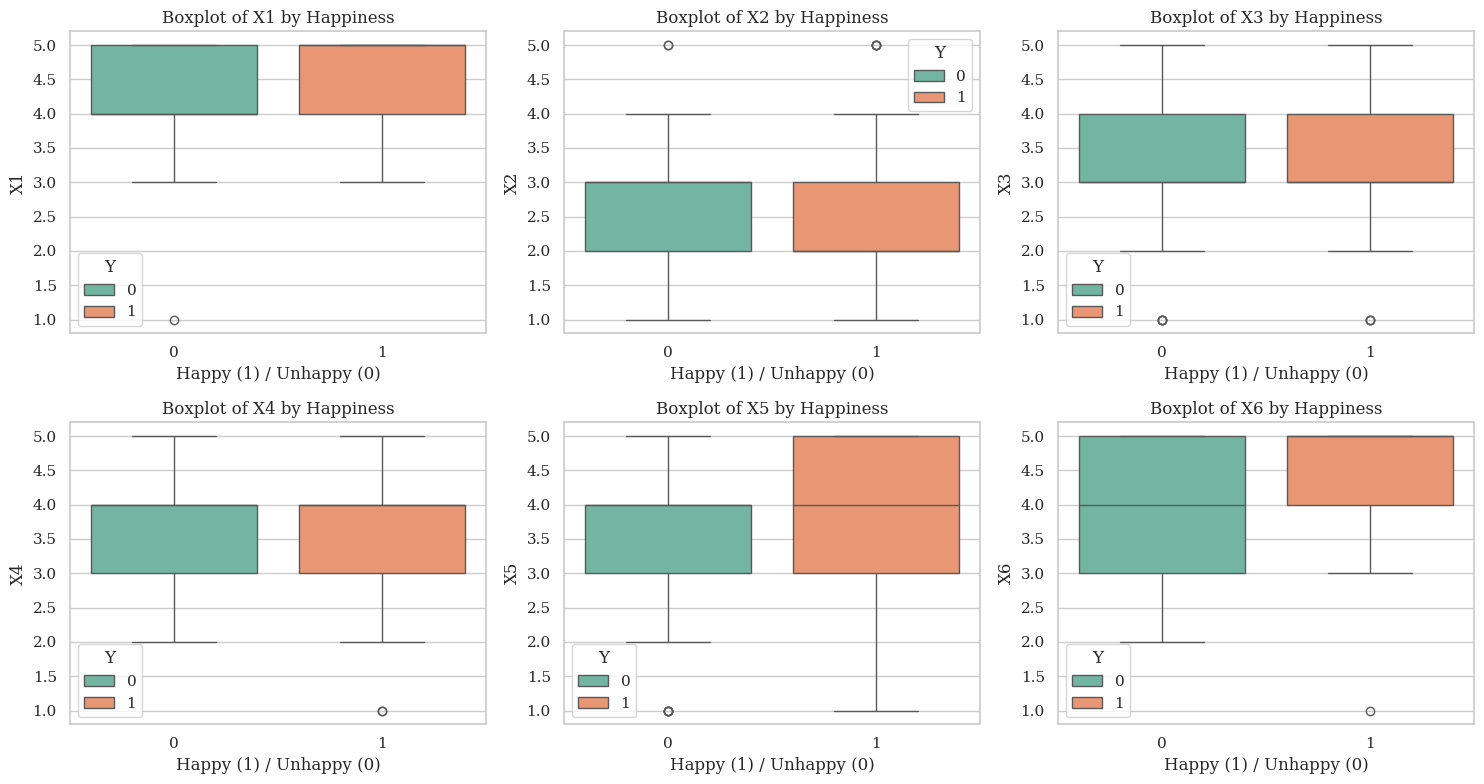

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    sns.boxplot(
        x='Y',
        y=feature,
        data=happiness_data,
        ax=axes[row, col],
        palette='Set2',
        hue='Y'
    )
    axes[row, col].set_title(f'Boxplot of {feature} by Happiness')
    axes[row, col].set_xlabel('Happy (1) / Unhappy (0)')
    axes[row, col].set_ylabel(feature)
plt.tight_layout()
plt.show()

The box plots for the different features show that X5 and X6 can be differentiating factors for classification purposes.

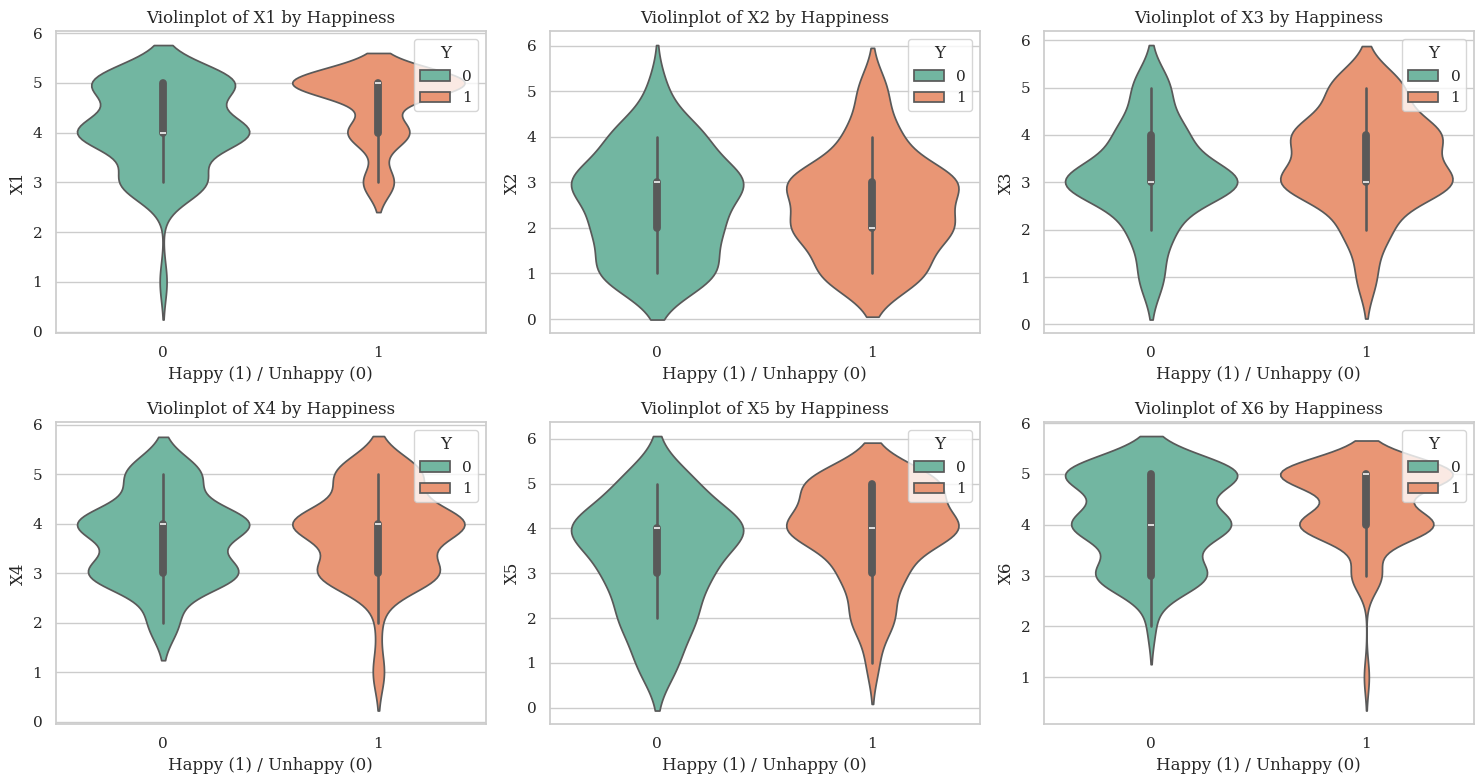

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    sns.violinplot(
        x='Y',
        y=feature,
        data=happiness_data,
        ax=axes[row, col],
        palette='Set2',
        inner='box',
        hue='Y'
    )
    axes[row, col].set_title(f'Violinplot of {feature} by Happiness')
    axes[row, col].set_xlabel('Happy (1) / Unhappy (0)')
    axes[row, col].set_ylabel(feature)
plt.tight_layout()
plt.show()

* Following the boxplopts, the violin plots depiction show that X1, X5 and X6 can be prominent differentiating factors in the classification process. It is apparent that larger values of X1 indicate happy customers.
* X2, X3 and X4 do not depict significant differences between the two labels.
* X5 and X6 has more concentration of higher choices for happy customers compared to unhappy customers, and thus, can be important differentiators in the classification process.
* The boxplots and violin plots give a good qualitative outlook on the different features.

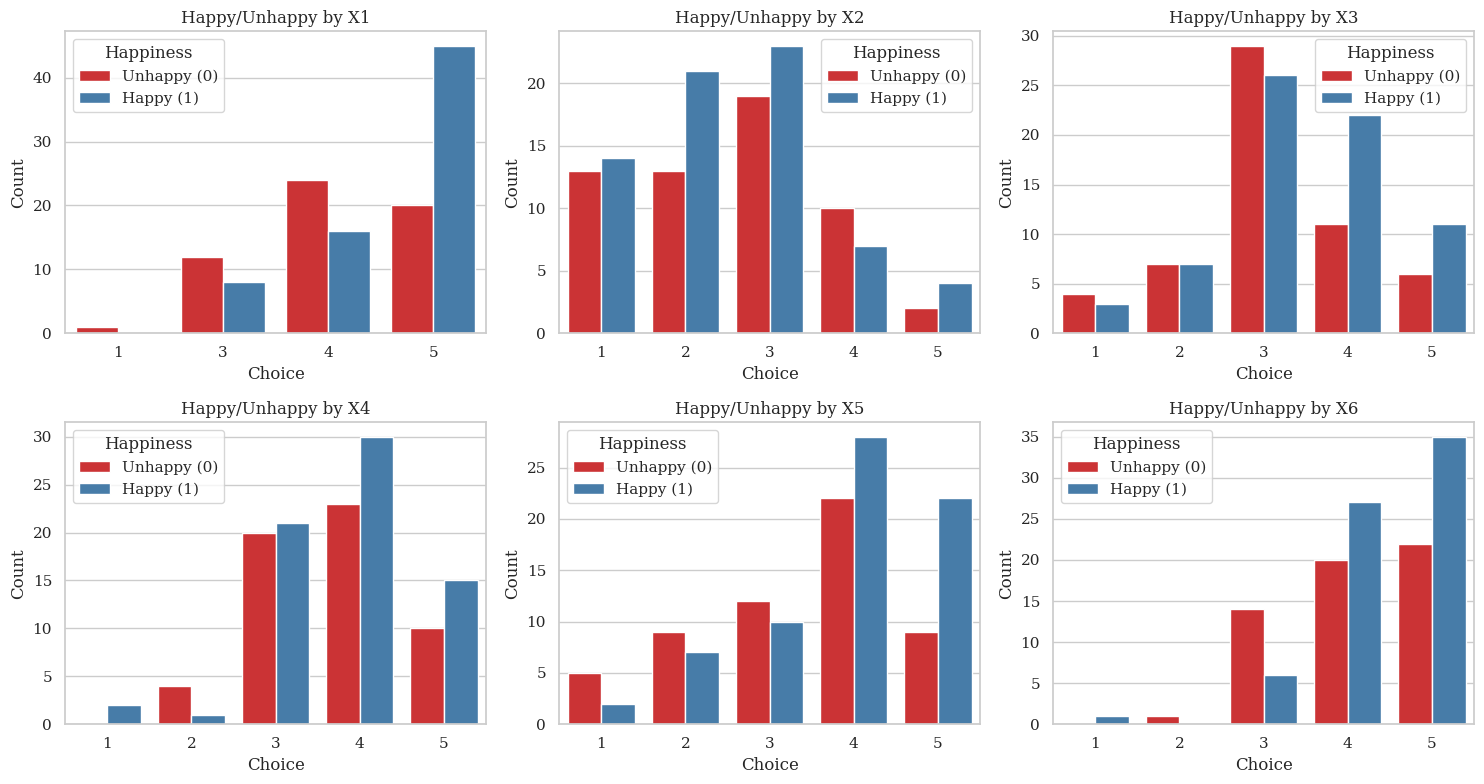

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    sns.countplot(
        x=feature,
        hue='Y',
        data=happiness_data,
        ax=ax,
        palette='Set1'
    )
    ax.set_title(f'Happy/Unhappy by {feature}')
    ax.set_xlabel('Choice')
    ax.set_ylabel('Count')
    ax.legend(title='Happiness', labels=['Unhappy (0)', 'Happy (1)'])
    
plt.tight_layout()
plt.show()

It can be observed that there are marked differences in the higher choices for features X1, X3, X5 and X6. These can be prominent choices for creating the classification models.

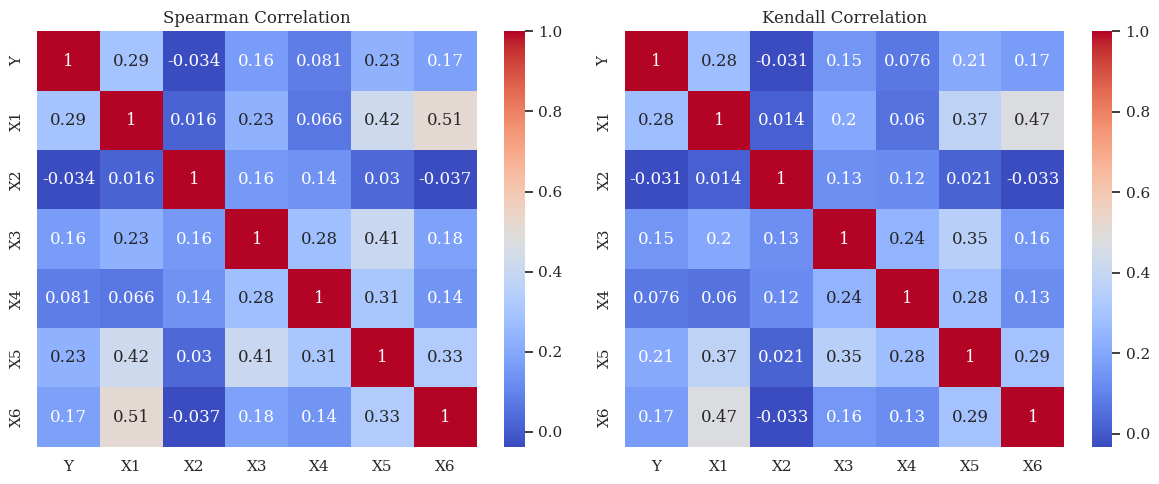

In [11]:
# Calculate correlation matrices using different methods
corr_spearman = happiness_data.corr(method='spearman')
corr_kendall = happiness_data.corr(method='kendall')

plt.figure(figsize=(12, 5))

# Spearman heatmap
plt.subplot(1, 2, 1)
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', vmax=1)
plt.title("Spearman Correlation")

# Kendall heatmap
plt.subplot(1, 2, 2)
sns.heatmap(corr_kendall, annot=True, cmap='coolwarm', vmax=1)
plt.title("Kendall Correlation")

plt.tight_layout()
plt.show()

The above plots reiterate our previous set of observations. It is clear that X1, X5 and X6 can be distinguishing features along with X3.

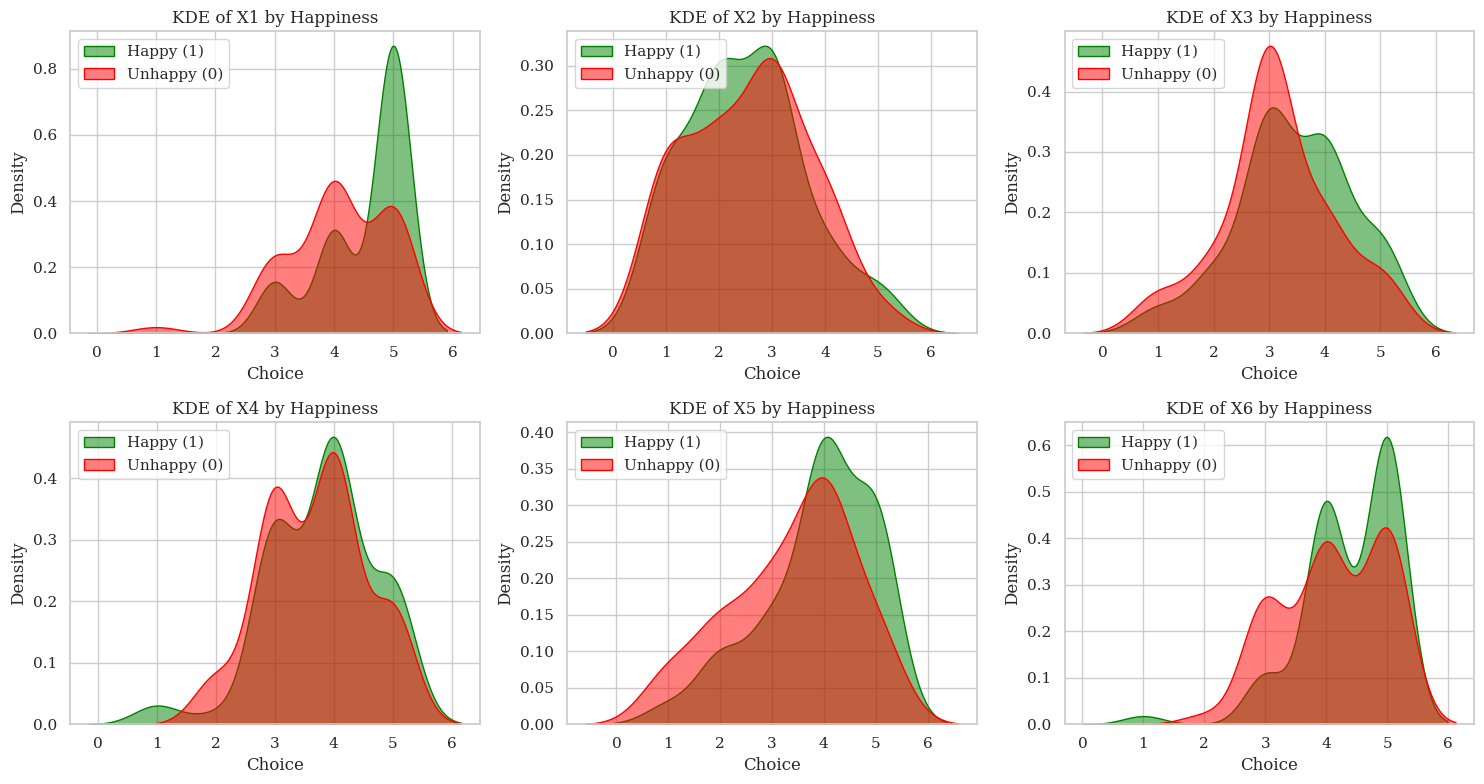

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    sns.kdeplot(
        data=happiness_data[happiness_data['Y'] == 1],
        x=feature,
        fill=True,
        common_norm=False,
        alpha=0.5,
        label='Happy (1)',
        ax=ax,
        color='green'
    )
    sns.kdeplot(
        data=happiness_data[happiness_data['Y'] == 0],
        x=feature,
        fill=True,
        common_norm=False,
        alpha=0.5,
        label='Unhappy (0)',
        ax=ax,
        color='red'
    )
    ax.set_title(f'KDE of {feature} by Happiness')
    ax.set_xlabel('Choice')
    ax.set_ylabel('Density')
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

Data preprocessing

In [13]:
from sklearn.model_selection import train_test_split

X = happiness_data[features]
y = happiness_data['Y']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Training label distribution:\n", y_train.value_counts(normalize=True))
print("Validation label distribution:\n", y_val.value_counts(normalize=True))

Training set size: 100
Validation set size: 26
Training label distribution:
 Y
1    0.55
0    0.45
Name: proportion, dtype: float64
Validation label distribution:
 Y
1    0.538462
0    0.461538
Name: proportion, dtype: float64


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [15]:
import statsmodels.api as sm

# Add constant for intercept
X_train_sm = sm.add_constant(X_train_scaled)

# Fit logistic regression model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Display model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.646105
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       93
Method:                           MLE   Df Model:                            6
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                 0.06108
Time:                        21:32:12   Log-Likelihood:                -64.610
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                    0.2098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2085      0.210      0.994      0.320      -0.203       0.620
x1             0.4158      0.

From the initial logistic regression run using the statsmodels, the X1 feature is observed to have the largest effect on the final prediction. X4 is seen to have very less effect. X2 and X5 have also significant effects on the target variable. X1, X2 and X5 can be a candidate pool for the features for the ML model. Though, the statistical significance of the different features are over the 95% threshold.

Best parameters: {'max_depth': 3, 'max_features': 0.75, 'min_samples_leaf': 1, 'n_estimators': 200}
  Feature  Importance
0      X1    0.245950
4      X5    0.183219
2      X3    0.173474
3      X4    0.144021
5      X6    0.129909
1      X2    0.123427
Accuracy on validation set: 0.7308


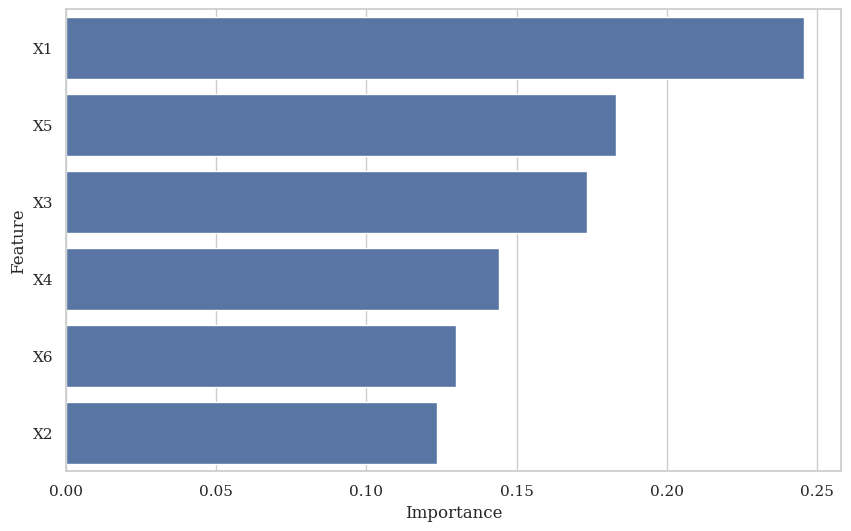

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter search
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.5, 0.75, 1.0]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Best estimator
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Feature importances
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)
print(f"Accuracy on validation set: {best_rf.score(X_val_scaled, y_val):.4f}")

#Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df
)

plt.show()

Best parameters: {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 5, 'gamma': 0.2, 'eta': 0.1, 'colsample_bytree': 1.0}
Number of features: 6
Number of examples: 100
  Feature  Importance
0      X1    0.208018
5      X6    0.171275
4      X5    0.167295
2      X3    0.159996
1      X2    0.150092
3      X4    0.143324
Validation set accuracy: 0.7308


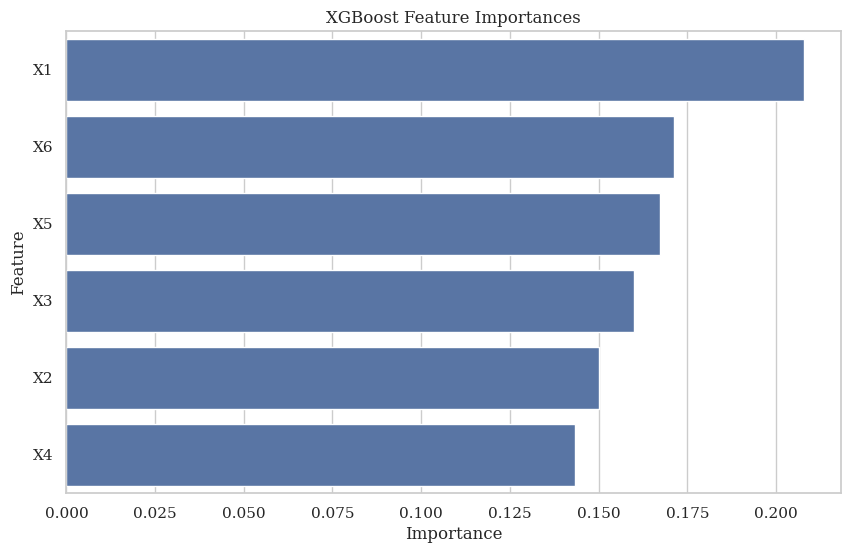

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'gamma': [0, 0.1, 0.2, 0.5, 1],
    'eta': [0.01, 0.05, 0.1, 0.2, 0.3],
    'colsample_bytree': [0.5, 0.75, 1.0],
    'max_depth': [3, 5, 7, None],
    'subsample': [0.5, 0.75, 1.0]
}


xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=200,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

best_xgb = random_search.best_estimator_
val_score = best_xgb.score(X_val_scaled, y_val)

# Feature importance
xgb_importances = best_xgb.feature_importances_
xgb_feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

print("Best parameters:", random_search.best_params_)
print("Number of features:", X_train.shape[1])
print("Number of examples:", X_train.shape[0])
print(xgb_feature_importance_df)
print(f"Validation set accuracy: {val_score:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=xgb_feature_importance_df
)
plt.title('XGBoost Feature Importances')
plt.show()

In [18]:
# Ensure compatible scikit-learn version for lazypredict
# %pip install scikit-learn==1.1.3 --quiet

from contextlib import redirect_stderr, redirect_stdout
from io import StringIO
from lazypredict.Supervised import LazyClassifier
import warnings

# Define feature sets to test
feature_sets = {
    'All Features': features,
    '[X1, X3, X5]': ['X1', 'X3', 'X5'],
    '[X1, X5, X6]': ['X1', 'X5', 'X6'],
    '[X1, X3, X5, X6]': ['X1', 'X3', 'X5', 'X6']
}

results = {}

for name, feats in feature_sets.items():

    # Scale features
    X_train_fs = scaler.fit_transform(X_train[feats])
    X_val_fs = scaler.transform(X_val[feats])
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        with redirect_stdout(StringIO()), redirect_stderr(StringIO()):
            clf = LazyClassifier(verbose=0, ignore_warnings=True)
            models, predictions = clf.fit(X_train_fs, X_val_fs, y_train, y_val)
            results[name] = models.head(3)
            

# Display results
for name, models in results.items():
    print(f"\nTop 3 models for {name}:")
    print(models[['Accuracy', 'Balanced Accuracy', 'F1 Score', 'ROC AUC']])


Top 3 models for All Features:
                    Accuracy  Balanced Accuracy  F1 Score  ROC AUC
Model                                                             
SGDClassifier           0.69               0.69      0.69     0.69
NearestCentroid         0.69               0.68      0.69     0.68
AdaBoostClassifier      0.69               0.68      0.68     0.68

Top 3 models for [X1, X3, X5]:
                    Accuracy  Balanced Accuracy  F1 Score  ROC AUC
Model                                                             
AdaBoostClassifier      0.77               0.76      0.76     0.76
LGBMClassifier          0.73               0.73      0.73     0.73
LabelPropagation        0.73               0.73      0.73     0.73

Top 3 models for [X1, X5, X6]:
                        Accuracy  Balanced Accuracy  F1 Score  ROC AUC
Model                                                                 
DecisionTreeClassifier      0.81               0.80      0.81     0.80
ExtraTreeClassifier  

In [19]:
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier

def best_model_feature_subset(model, X_train, y_train, X_val, y_val, feature_names, min_features=2,random_state=42):
    """
    Trains DecisionTreeClassifier on all feature subsets (size >= min_features),
    returns the best feature combination and its validation score.
    """
    best_score = 0
    best_features = None
    best_model = None

    for k in range(min_features, len(feature_names)+1):
        for feats in combinations(feature_names, k):
            # Train on selected features
            feats = list(feats)

            X_train_fs = scaler.fit_transform(X_train[feats])
            X_val_fs = scaler.transform(X_val[feats])

            clf = model(random_state=random_state)
            clf.fit(X_train_fs, y_train)
            score = clf.score(X_val_fs, y_val)
            if score > best_score:
                best_score = score
                best_features = feats
                best_model = clf

    print(f"Best feature combination on model {model}: {best_features}")
    print(f"Validation set accuracy on model {model}: {best_score:.4f}")
    return best_model, best_features, best_score

In [20]:
best_DT_model, best_DT_feats, best_DT_score = best_model_feature_subset(DecisionTreeClassifier, X_train, y_train, X_val, y_val, features)
best_XGB_model, best_XGB_feats, best_XGB_score = best_model_feature_subset(XGBClassifier, X_train, y_train, X_val, y_val, features)

Best feature combination on model <class 'sklearn.tree._classes.DecisionTreeClassifier'>: ['X1', 'X2', 'X4']
Validation set accuracy on model <class 'sklearn.tree._classes.DecisionTreeClassifier'>: 0.8462
Best feature combination on model <class 'xgboost.sklearn.XGBClassifier'>: ['X1', 'X2', 'X5']
Validation set accuracy on model <class 'xgboost.sklearn.XGBClassifier'>: 0.8462


In [21]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define feature combinations
feature_combos = {
    '[X1, X3, X5]': ['X1', 'X3', 'X5'],
    '[X1, X2, X5]': ['X1', 'X2', 'X5'],
    '[X1, X6, X5]': ['X1', 'X6', 'X5'],
    '[X1, X3, X5, X6]': ['X1', 'X3', 'X5', 'X6']
}

optuna_results = {}

for combo_name, feats in feature_combos.items():
    def objective(trial):
        params = {
            'eta': trial.suggest_float('eta', 0.01, 0.3, log=True),
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'gamma': trial.suggest_float('gamma', 0, 1.0),
            'max_depth': trial.suggest_int('max_depth', 2, 8),
            'colsample_bytree': 1.0,
            'use_label_encoder': False,
            'eval_metric': 'logloss',
            'random_state': 42
        }
        # Scale features
        X_train_fs = scaler.fit_transform(X_train[feats])
        X_val_fs = scaler.transform(X_val[feats])
        model = XGBClassifier(**params)
        model.fit(X_train_fs, y_train)
        preds = model.predict(X_val_fs)
        return accuracy_score(y_val, preds)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=30, show_progress_bar=False)
    best_params = study.best_params
    best_score = study.best_value

    # Train best model for reporting
    X_train_fs = scaler.fit_transform(X_train[feats])
    X_val_fs = scaler.transform(X_val[feats])
    best_model = XGBClassifier(
        **{**best_params, 'colsample_bytree': 1.0, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42}
    )
    best_model.fit(X_train_fs, y_train)
    val_score = accuracy_score(y_val, best_model.predict(X_val_fs))

    optuna_results[combo_name] = {
        'best_params': best_params,
        'validation_score': val_score,
        'model': best_model
    }
    print(f"Feature combo: {combo_name}")
    print(f"Best params: {best_params}")
    print(f"Validation accuracy: {val_score:.4f}\n")

[I 2025-06-11 21:34:48,937] A new study created in memory with name: no-name-a8c61f98-ca98-40a1-b708-58355bc6e8fa
[I 2025-06-11 21:34:49,003] Trial 0 finished with value: 0.7692307692307693 and parameters: {'eta': 0.10703361408334816, 'n_estimators': 420, 'gamma': 0.7228681086765714, 'max_depth': 3}. Best is trial 0 with value: 0.7692307692307693.
[I 2025-06-11 21:34:49,020] Trial 1 finished with value: 0.7692307692307693 and parameters: {'eta': 0.07714636123342648, 'n_estimators': 53, 'gamma': 0.731051055913717, 'max_depth': 6}. Best is trial 0 with value: 0.7692307692307693.
[I 2025-06-11 21:34:49,078] Trial 2 finished with value: 0.7692307692307693 and parameters: {'eta': 0.20741514623997767, 'n_estimators': 406, 'gamma': 0.13647959621518013, 'max_depth': 5}. Best is trial 0 with value: 0.7692307692307693.
[I 2025-06-11 21:34:49,105] Trial 3 finished with value: 0.7692307692307693 and parameters: {'eta': 0.06516834863281672, 'n_estimators': 166, 'gamma': 0.9979845052295819, 'max_dep

Feature combo: [X1, X3, X5]
Best params: {'eta': 0.10703361408334816, 'n_estimators': 420, 'gamma': 0.7228681086765714, 'max_depth': 3}
Validation accuracy: 0.7692



[I 2025-06-11 21:34:50,997] Trial 5 finished with value: 0.8461538461538461 and parameters: {'eta': 0.18214230268156398, 'n_estimators': 89, 'gamma': 0.5025905512312757, 'max_depth': 5}. Best is trial 3 with value: 0.8461538461538461.
[I 2025-06-11 21:34:51,063] Trial 6 finished with value: 0.8076923076923077 and parameters: {'eta': 0.025042908638013905, 'n_estimators': 412, 'gamma': 0.5758762230582575, 'max_depth': 3}. Best is trial 3 with value: 0.8461538461538461.
[I 2025-06-11 21:34:51,123] Trial 7 finished with value: 0.7692307692307693 and parameters: {'eta': 0.036743579189020194, 'n_estimators': 340, 'gamma': 0.38474003291290493, 'max_depth': 2}. Best is trial 3 with value: 0.8461538461538461.
[I 2025-06-11 21:34:51,166] Trial 8 finished with value: 0.7692307692307693 and parameters: {'eta': 0.0679110099191295, 'n_estimators': 279, 'gamma': 0.4565728852801979, 'max_depth': 2}. Best is trial 3 with value: 0.8461538461538461.
[I 2025-06-11 21:34:51,195] Trial 9 finished with value

Feature combo: [X1, X2, X5]
Best params: {'eta': 0.04728531237466738, 'n_estimators': 103, 'gamma': 0.44101929791358085, 'max_depth': 6}
Validation accuracy: 0.8462



[I 2025-06-11 21:34:52,614] Trial 4 finished with value: 0.8076923076923077 and parameters: {'eta': 0.04337001125074999, 'n_estimators': 311, 'gamma': 0.305172904589152, 'max_depth': 2}. Best is trial 0 with value: 0.8076923076923077.
[I 2025-06-11 21:34:52,650] Trial 5 finished with value: 0.7692307692307693 and parameters: {'eta': 0.25017505996945893, 'n_estimators': 259, 'gamma': 0.5297269200178183, 'max_depth': 2}. Best is trial 0 with value: 0.8076923076923077.
[I 2025-06-11 21:34:52,675] Trial 6 finished with value: 0.7692307692307693 and parameters: {'eta': 0.04494772761405383, 'n_estimators': 120, 'gamma': 0.4160002243295873, 'max_depth': 7}. Best is trial 0 with value: 0.8076923076923077.
[I 2025-06-11 21:34:52,699] Trial 7 finished with value: 0.7692307692307693 and parameters: {'eta': 0.23019200183930105, 'n_estimators': 136, 'gamma': 0.7443287962912855, 'max_depth': 3}. Best is trial 0 with value: 0.8076923076923077.
[I 2025-06-11 21:34:52,725] Trial 8 finished with value: 

Feature combo: [X1, X6, X5]
Best params: {'eta': 0.011031539813201548, 'n_estimators': 213, 'gamma': 0.005178184461136576, 'max_depth': 8}
Validation accuracy: 0.8462



[I 2025-06-11 21:34:54,615] Trial 2 finished with value: 0.7692307692307693 and parameters: {'eta': 0.2122471140148685, 'n_estimators': 484, 'gamma': 0.6163384392614479, 'max_depth': 7}. Best is trial 0 with value: 0.7692307692307693.
[I 2025-06-11 21:34:54,664] Trial 3 finished with value: 0.7692307692307693 and parameters: {'eta': 0.22934494847169196, 'n_estimators': 211, 'gamma': 0.43820902757188385, 'max_depth': 6}. Best is trial 0 with value: 0.7692307692307693.
[I 2025-06-11 21:34:54,788] Trial 4 finished with value: 0.7692307692307693 and parameters: {'eta': 0.021388668611280515, 'n_estimators': 375, 'gamma': 0.04785211925934019, 'max_depth': 6}. Best is trial 0 with value: 0.7692307692307693.
[I 2025-06-11 21:34:54,843] Trial 5 finished with value: 0.7692307692307693 and parameters: {'eta': 0.060915325027814424, 'n_estimators': 311, 'gamma': 0.22709216051254222, 'max_depth': 3}. Best is trial 0 with value: 0.7692307692307693.
[I 2025-06-11 21:34:54,873] Trial 6 finished with va

Feature combo: [X1, X3, X5, X6]
Best params: {'eta': 0.07275455723353702, 'n_estimators': 499, 'gamma': 0.7069230383649505, 'max_depth': 4}
Validation accuracy: 0.7692



              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.86      0.86      0.86        14

    accuracy                           0.85        26
   macro avg       0.85      0.85      0.85        26
weighted avg       0.85      0.85      0.85        26



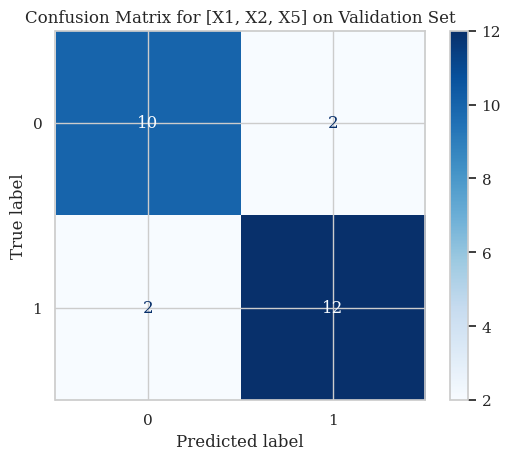

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Prepare the data
selected_feats = ['X1', 'X2', 'X5']
X_train_fs = scaler.fit_transform(X_train[selected_feats])
X_val_fs = scaler.transform(X_val[selected_feats])

# Train the XGBoost model with given parameters
xgb_model = XGBClassifier(
    eta=0.027982122895543676,
    n_estimators=82,
    gamma=0.6284233622363933,
    max_depth=8,
    colsample_bytree=1.0,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_fs, y_train)

# Predict on validation set
y_pred = xgb_model.predict(X_val_fs)

# Classification report
print(classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for [X1, X2, X5] on Validation Set")
plt.grid('off')
plt.show()

In [23]:
import joblib

# Save the trained XGBoost model to a .pkl file
joblib.dump(xgb_model, "xgb_model_X1_X2_X5.pkl")

['xgb_model_X1_X2_X5.pkl']

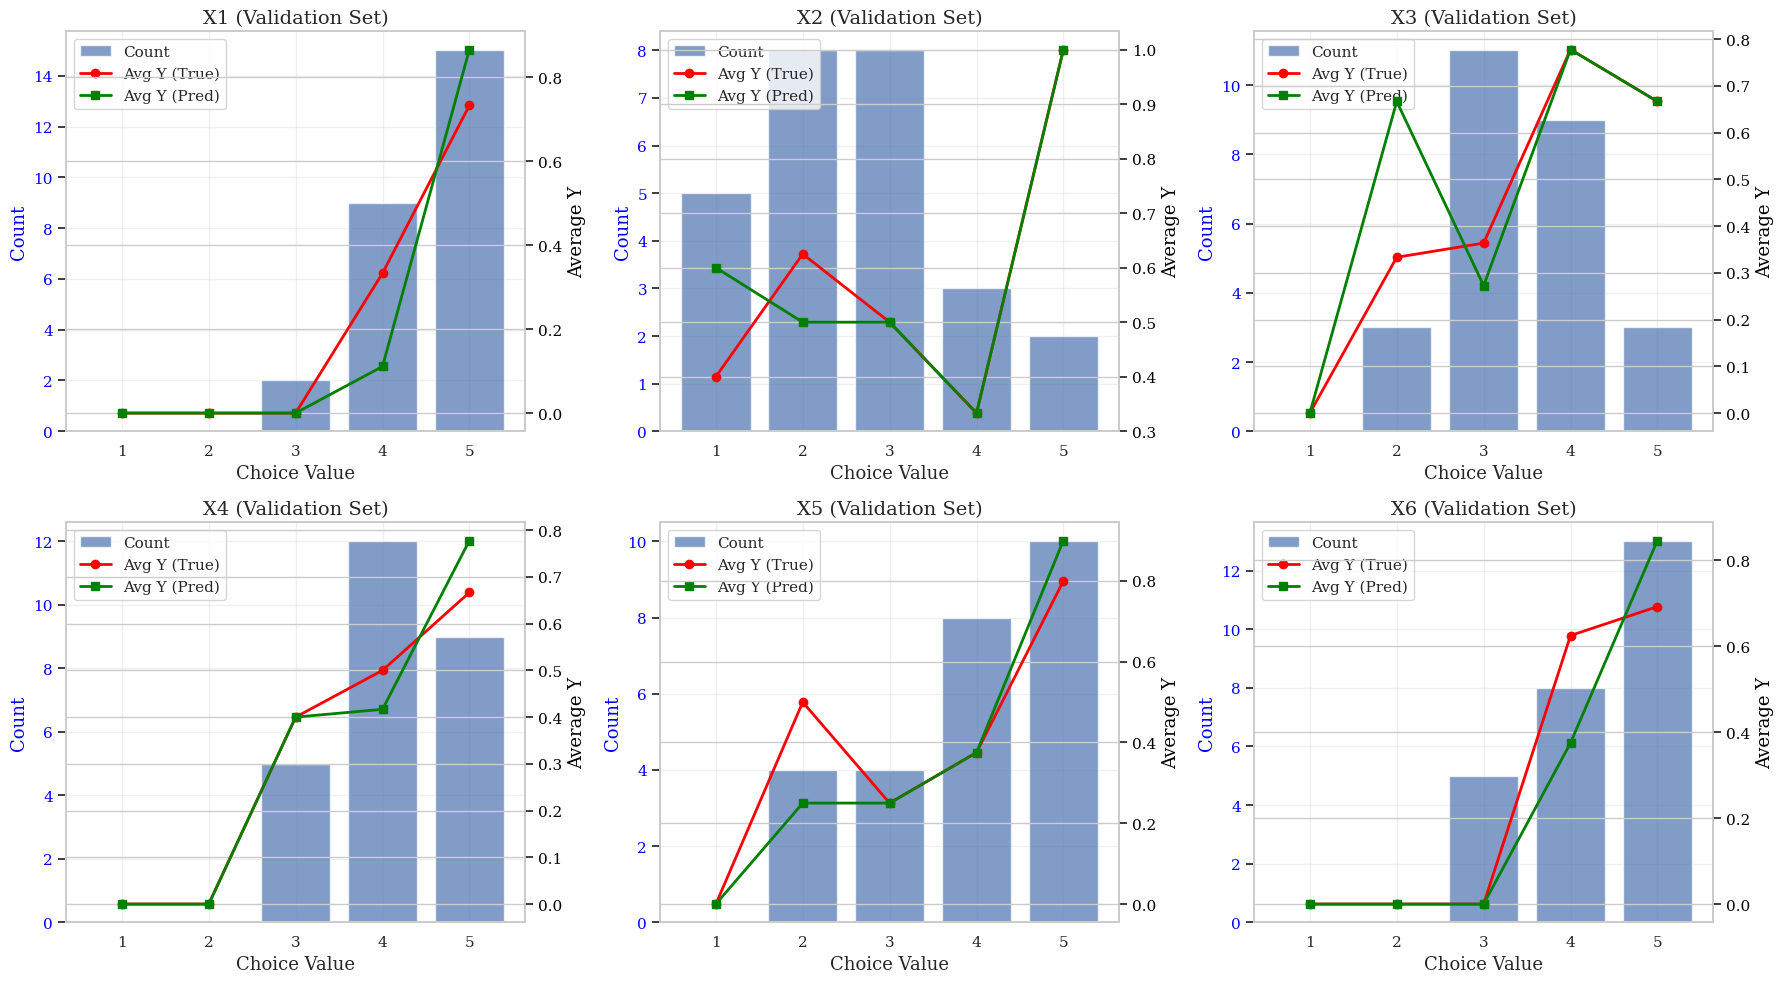

In [24]:
# Prepare predicted values for validation set
y_val_pred = xgb_model.predict(X_val_fs)

# Prepare subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
vals = [1, 2, 3, 4, 5]

for idx, feature in enumerate(feature_names):
    row = idx // 3
    col = idx % 3
    ax1 = axes[row, col]

    # Count occurrences for each value
    counts = []
    avg_y_true = []
    avg_y_pred = []
    for v in vals:
        mask = X_val[feature] == v
        counts.append(mask.sum())
        if mask.sum() > 0:
            avg_y_true.append(y_val[mask].mean())
            avg_y_pred.append(y_val_pred[mask].mean())
        else:
            avg_y_true.append(0)
            avg_y_pred.append(0)

    # Bar plot for counts
    bars = ax1.bar(vals, counts, alpha=0.7, label='Count')
    ax1.set_xlabel('Choice Value', fontsize=13)
    ax1.set_ylabel('Count', color='blue', fontsize=13)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(vals)
    ax1.set_title(f"{feature} (Validation Set)", fontsize=14)
    ax1.grid(True, alpha=0.3)

    # Line plots for average Y (true and predicted)
    ax2 = ax1.twinx()
    line1 = ax2.plot(vals, avg_y_true, color='red', marker='o', linewidth=2, markersize=6, label='Avg Y (True)')
    line2 = ax2.plot(vals, avg_y_pred, color='green', marker='s', linewidth=2, markersize=6, label='Avg Y (Pred)')
    ax2.set_ylabel('Average Y', color='black', fontsize=13)
    ax2.tick_params(axis='y', labelcolor='black')

    # Combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()